In [1]:
import pandas as pd

df = pd.read_csv('profiles.csv')
#df.head()

columns=df.columns
for column in columns:
    print (column, df[column].nunique())
categories = [column for column in columns if df[column].nunique()< 20] 

print(categories)

age 54
body_type 12
diet 18
drinks 6
drugs 3
education 32
essay0 54350
essay1 51516
essay2 48635
essay3 43533
essay4 49260
essay5 48963
essay6 43603
essay7 45554
essay8 39324
essay9 45443
ethnicity 217
height 60
income 13
job 21
last_online 30123
location 199
offspring 15
orientation 3
pets 15
religion 45
sex 2
sign 48
smokes 5
speaks 7647
status 5
['body_type', 'diet', 'drinks', 'drugs', 'income', 'offspring', 'orientation', 'pets', 'sex', 'smokes', 'status']


Clean labels
It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [2]:
print("nnumber of categories:",df.sign.nunique())
print("categories:", df.sign.unique())
df['signsCleaned'] = df.sign.str.split().str.get(0)
print("number of categories:",df.signsCleaned.nunique())
print("categories:", df.signsCleaned.unique())

df.signsCleaned.value_counts()

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

Continues variables

age
The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

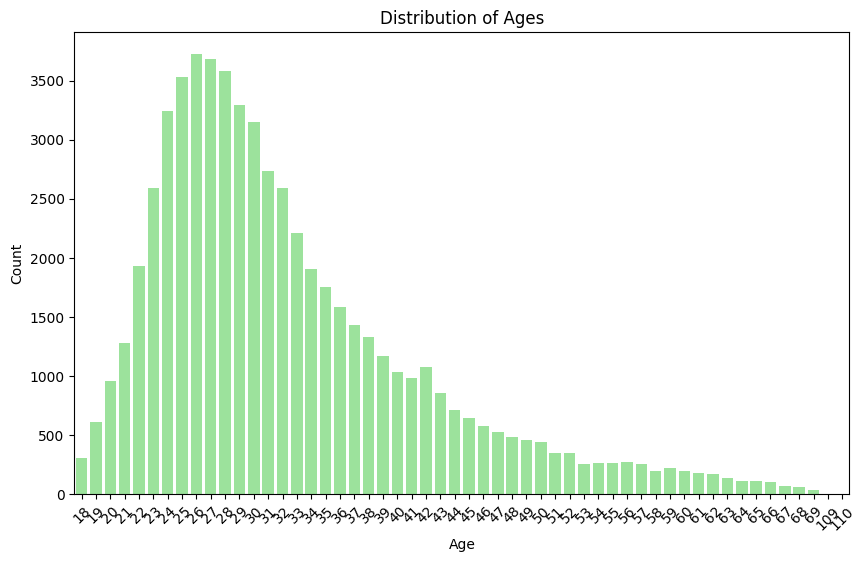

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
age_counts = df['age'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.xticks(rotation=45)
plt.show()

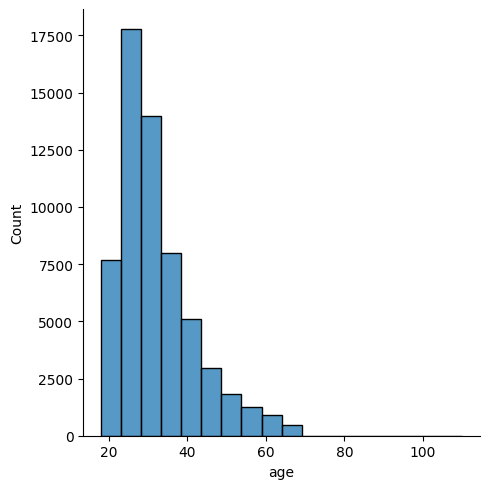

In [4]:
sns.displot(data = df, kind = 'hist', x = 'age', binwidth = 5)

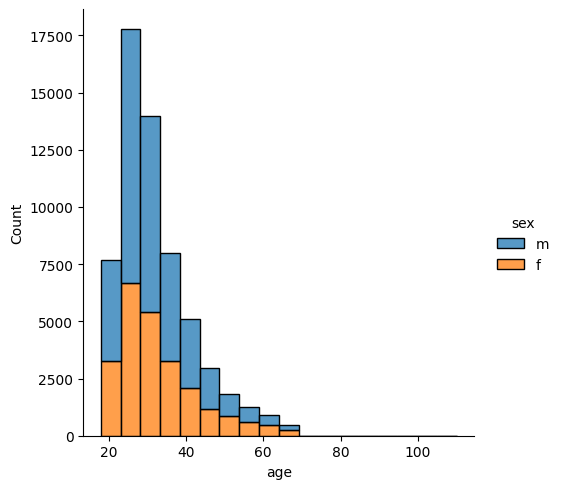

In [5]:
sns.displot(data = df, x = 'age', hue = 'sex', kind = 'hist',  binwidth = 5, multiple = "stack")

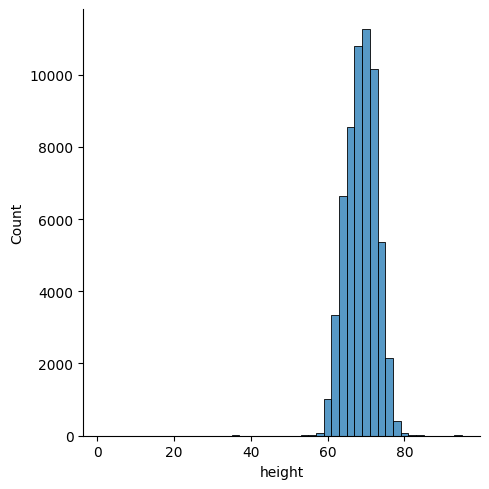

In [6]:
sns.displot(data = df, kind = 'hist', x = 'height', binwidth = 2)

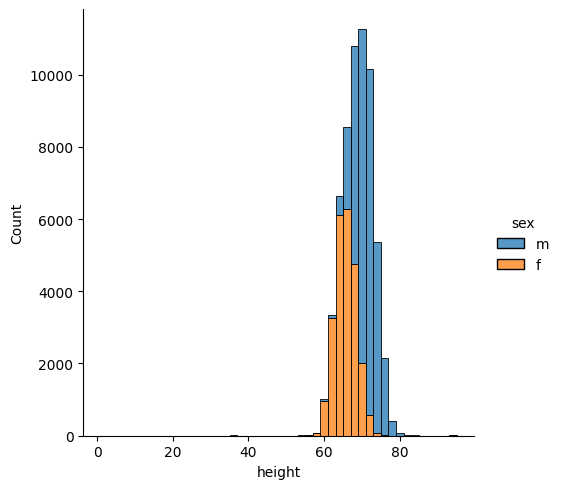

In [7]:
sns.displot(data = df, x = 'height', hue = 'sex', kind = 'hist',  binwidth = 2, multiple = "stack")

salary looks like majority of participants did not to disclose it

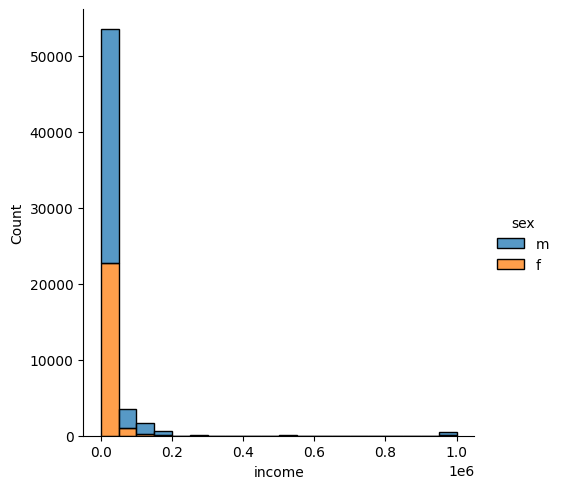

In [8]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

Descrete variables

Sex
Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

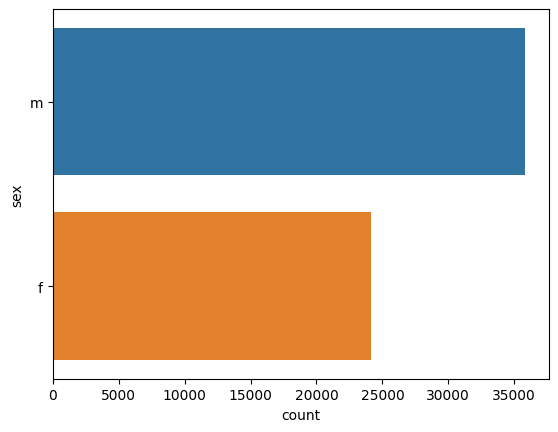

In [9]:
sns.countplot(data=df, y="sex", hue="sex");

<Axes: xlabel='count', ylabel='body_type'>

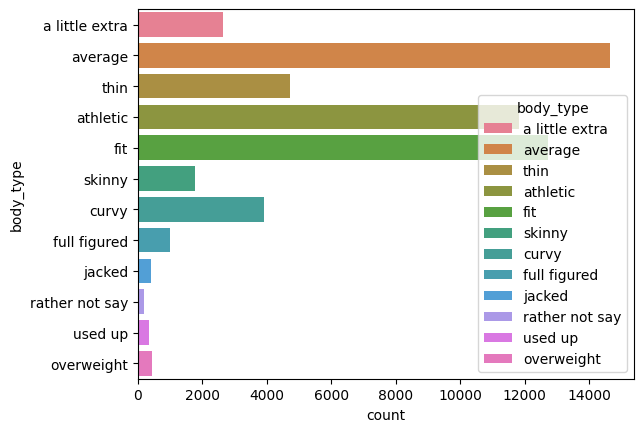

In [10]:
sns.countplot(data=df, y="body_type", hue = "body_type")

<Axes: xlabel='count', ylabel='body_type'>

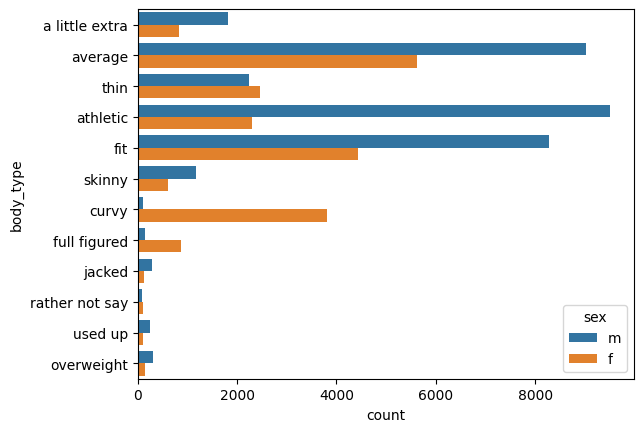

In [11]:
sns.countplot(data=df, y="body_type", hue = "sex")

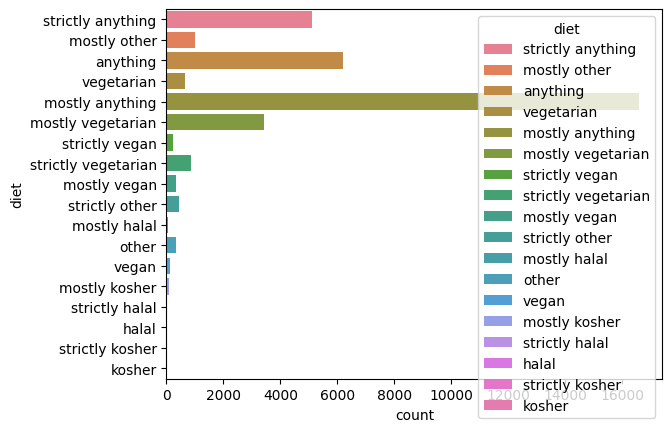

In [12]:
sns.countplot(data=df, y="diet", hue = "diet");

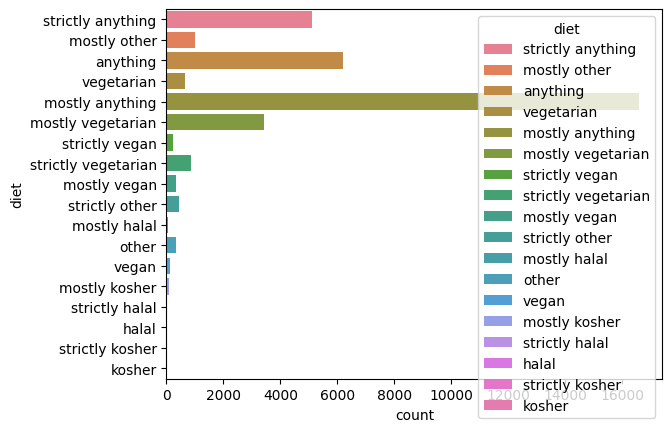

In [13]:
sns.countplot(data=df, y="diet", hue = "diet");

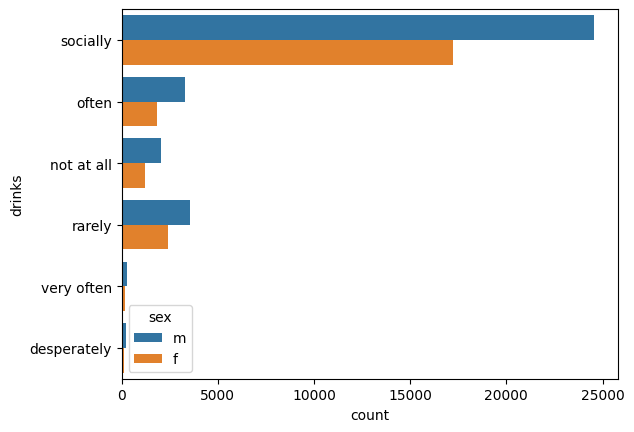

In [14]:
sns.countplot(data=df, y="drinks", hue = "sex");

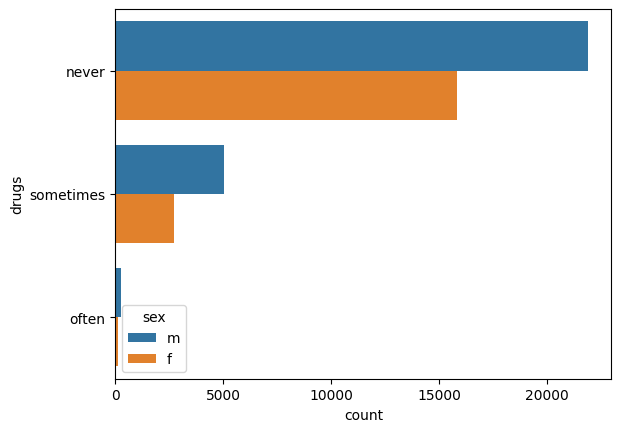

In [15]:
sns.countplot(data=df, y="drugs", hue = "sex");

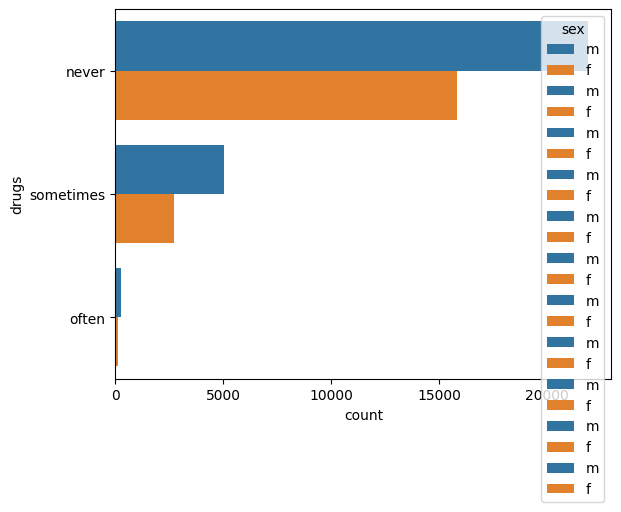

In [16]:
for category in categories: 
    sns.countplot(data=df, y="drugs", hue = "sex");

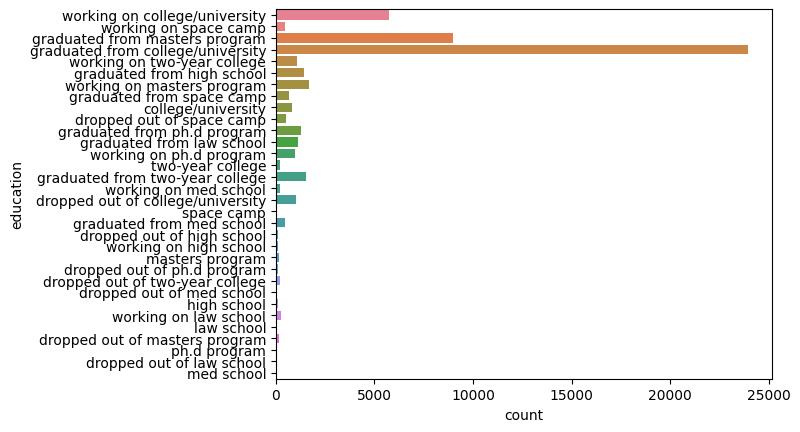

In [17]:
sns.countplot(data=df, y="education", hue = "education");
plt.legend().remove()

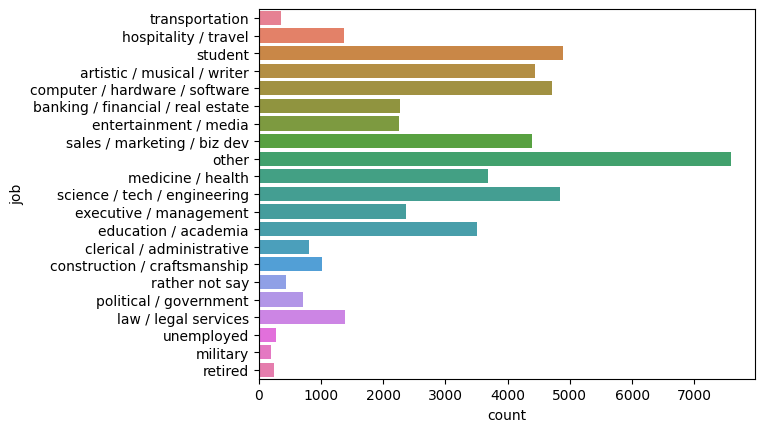

In [18]:
sns.countplot(data=df, y="job", hue = "job");
plt.legend().remove()

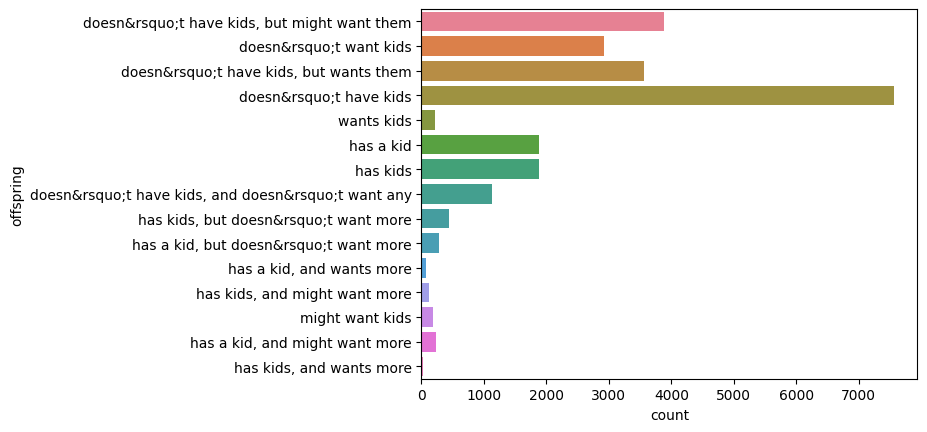

In [19]:
sns.countplot(data=df, y="offspring", hue = "offspring");
plt.legend().remove()

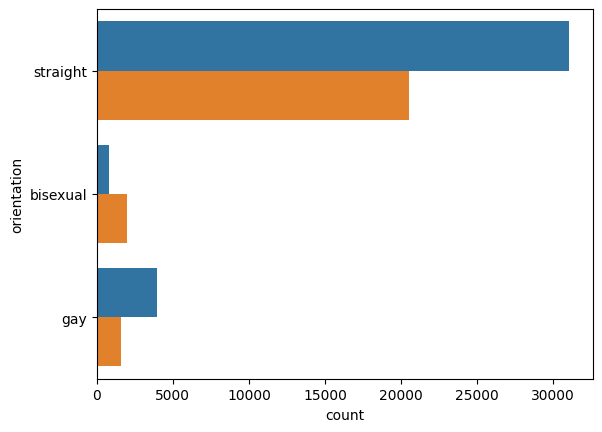

In [20]:
sns.countplot(data=df, y="orientation", hue = "sex");
plt.legend().remove()

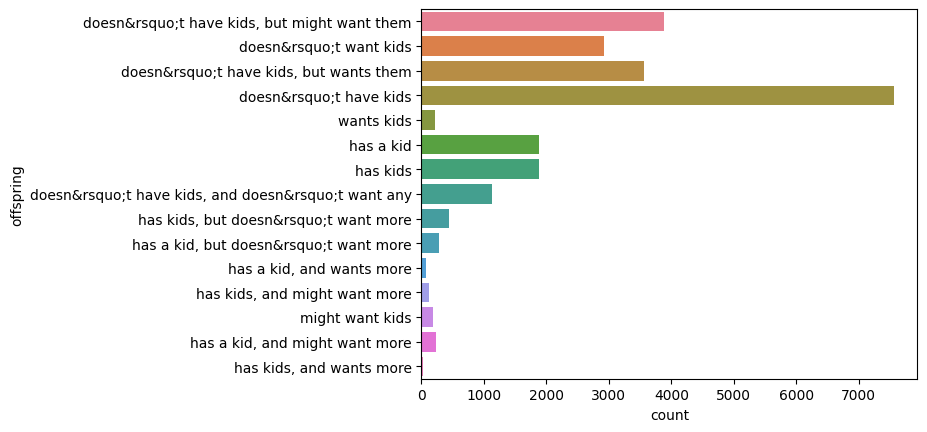

In [21]:
sns.countplot(data=df, y="offspring", hue = "offspring");
plt.legend().remove()

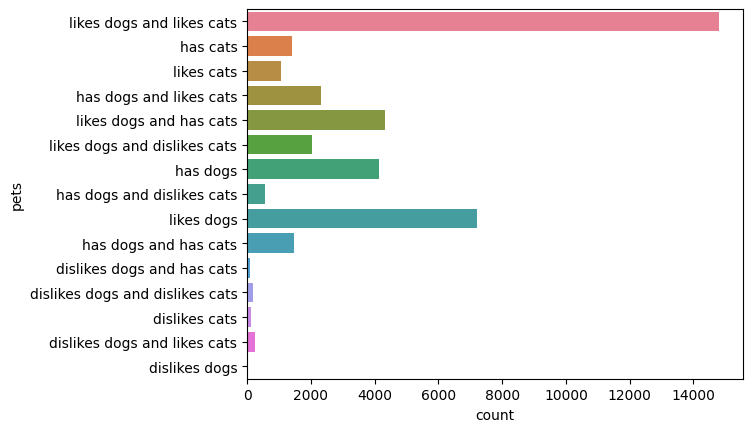

In [22]:
sns.countplot(data=df, y="pets", hue = "pets");
plt.legend().remove()

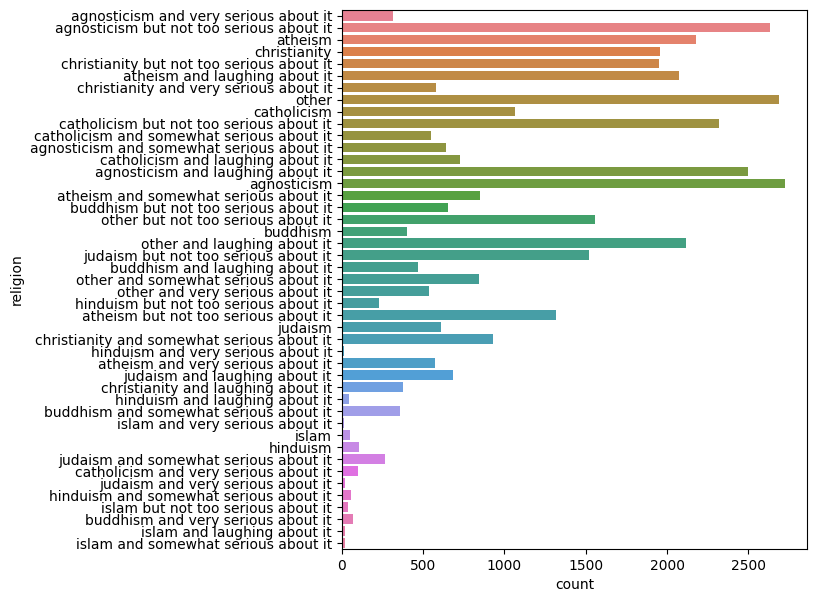

In [23]:
plt.figure(figsize=(6,7))
sns.countplot(data=df, y="religion", hue = "religion");
plt.legend().remove()

Too may shades of religion. simplipying, 

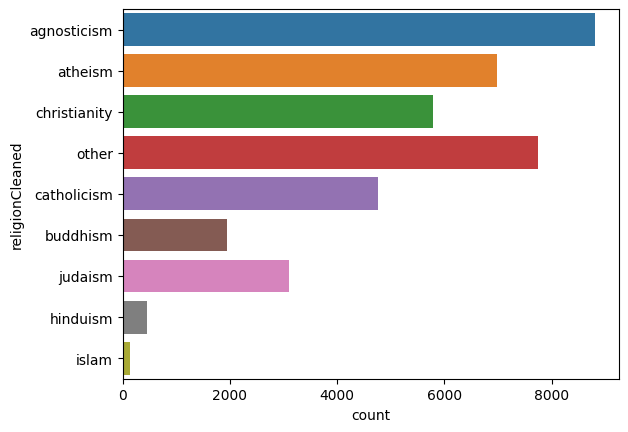

In [24]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned", hue = 'religionCleaned');
plt.legend().remove()

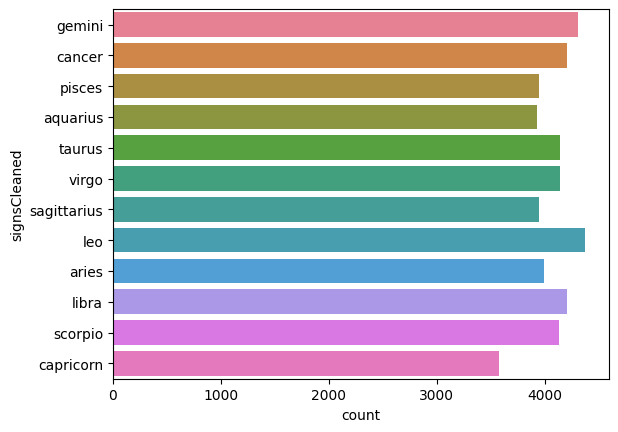

In [25]:
sns.countplot(data=df, y="signsCleaned", hue = 'signsCleaned');
plt.legend().remove()

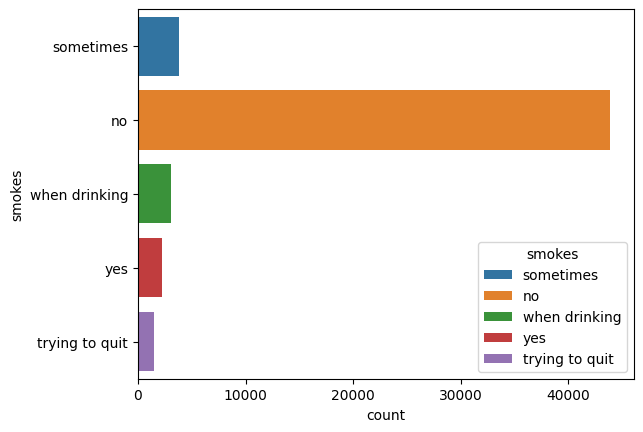

In [26]:
sns.countplot(data=df, y="smokes", hue = "smokes");

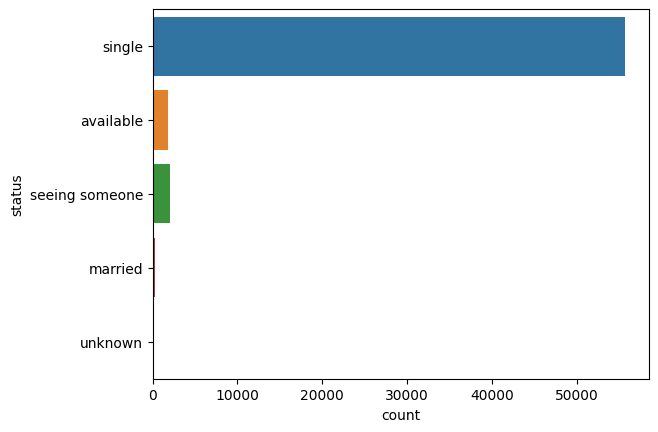

In [27]:
sns.countplot(data=df, y="status",hue= "status");

Missing Data
Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values.

In [28]:
df.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

In [29]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df_new = df[cols].dropna()
df.shape

(59946, 33)

In [30]:
for col in cols[:-1]:
    df_new = pd.get_dummies(df_new, columns=[col], prefix = [col])

In [31]:
df_new.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
df_new.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

In [33]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df_new.iloc[:, 1:col_length]
Y = df_new.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

LogisticRegression

In [35]:
lr_model = LogisticRegression().fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.02      0.04       968
       aries       0.09      0.04      0.06       983
      cancer       0.11      0.24      0.15      1129
   capricorn       0.19      0.01      0.01       882
      gemini       0.10      0.28      0.15      1130
         leo       0.12      0.17      0.14      1121
       libra       0.11      0.01      0.01      1028
      pisces       0.15      0.01      0.02       997
 sagittarius       0.14      0.07      0.09       965
     scorpio       0.17      0.01      0.02      1001
      taurus       0.09      0.16      0.12      1045
       virgo       0.11      0.20      0.15      1090

    accuracy                           0.11     12339
   macro avg       0.13      0.10      0.08     12339
weighted avg       0.12      0.11      0.08     12339



In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [38]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.12      0.14      0.13       968
       aries       0.13      0.08      0.10       983
      cancer       0.11      0.26      0.15      1129
   capricorn       0.11      0.05      0.07       882
      gemini       0.11      0.21      0.14      1130
         leo       0.12      0.13      0.12      1121
       libra       0.10      0.13      0.11      1028
      pisces       0.09      0.13      0.11       997
 sagittarius       0.17      0.07      0.10       965
     scorpio       0.11      0.03      0.05      1001
      taurus       0.14      0.05      0.08      1045
       virgo       0.22      0.04      0.07      1090

    accuracy                           0.11     12339
   macro avg       0.13      0.11      0.10     12339
weighted avg       0.13      0.11      0.10     12339



In [39]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [40]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.22      0.11      0.15       968
       aries       0.23      0.09      0.13       983
      cancer       0.12      0.35      0.17      1129
   capricorn       0.24      0.05      0.08       882
      gemini       0.13      0.19      0.16      1130
         leo       0.15      0.19      0.17      1121
       libra       0.16      0.09      0.11      1028
      pisces       0.28      0.03      0.05       997
 sagittarius       0.22      0.08      0.12       965
     scorpio       0.15      0.08      0.11      1001
      taurus       0.14      0.13      0.13      1045
       virgo       0.12      0.25      0.16      1090

    accuracy                           0.14     12339
   macro avg       0.18      0.14      0.13     12339
weighted avg       0.18      0.14      0.13     12339



In [41]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

In [51]:
!pip install lazypredict

   ---------------------------------------- 0.0/29.0 MB ? eta -:--:--
   -------------------------- ------------- 18.9/29.0 MB 99.0 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------  28.8/29.0 MB 96.2 MB/s eta 0:00:01
   ---------------------------------------- 29.0/29.0 MB 19.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.3 MB 122.7 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 122.7 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 122.7 MB/s eta 0:0

In [52]:
import lazypredict

In [55]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_val, Y_train, Y_val)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

                 Accuracy  Balanced Accuracy ROC AUC  F1 Score  Time Taken
Model                                                                     
DummyClassifier      0.09               0.08    None      0.01        0.19


In [56]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.616197 -> initscore=0.473438
[LightGBM] [Info] Start training from score 0.473438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 